In [1]:
from src.preprocessing.feature_loader import FeatureLoader
from src.common.constants import Constants as consts
from src.common.basic_functions import plot_embeddings_2d, plot_embeddings_subplots

from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Preparing data for visualization

In [23]:
feature_loader = FeatureLoader(consts.feature_extracted, emb_suffix=consts.wavlm_emb_suffix)
all_meta, all_embeddings = feature_loader.transfrorm_all()
print(all_meta.shape, all_embeddings.shape)

(1125881, 10) (1125881, 768)


In [24]:
sampled_meta = feature_loader.sample_fraction(fraction=0.6, metadata=all_meta)
print(sampled_meta.shape)

(675528, 10)


In [25]:
from src.preprocessing.data_balancers.undersample_spoof_balancer import UndersampleSpoofBalancer

undersample = UndersampleSpoofBalancer()
balanced_meta = undersample.transform(sampled_meta)
uq_target = np.unique(balanced_meta['target'], return_counts=True)
print(uq_target, np.sum(uq_target[-1]))
balanced_emb = feature_loader.load_embeddings_from_metadata(balanced_meta)
print(balanced_emb.shape)

(array(['bonafide', 'spoof'], dtype=object), array([31428, 31428])) 62856
(62856, 768)


## Eval umap model

In [26]:
from umap import UMAP

umap_model = UMAP(
    n_components=2,
    n_neighbors=30,
    min_dist=0.2,
    metric='cosine',
)
target = (balanced_meta['target'] == 'bonafide').astype(int)
X_umap_2d_no_supervised = umap_model.fit_transform(X=balanced_emb)

# Plot Data

## Plot data with 1:1 real to spoof ratio
Devided into:
1. Real and Spoof
2. Real only
3. Spoof only

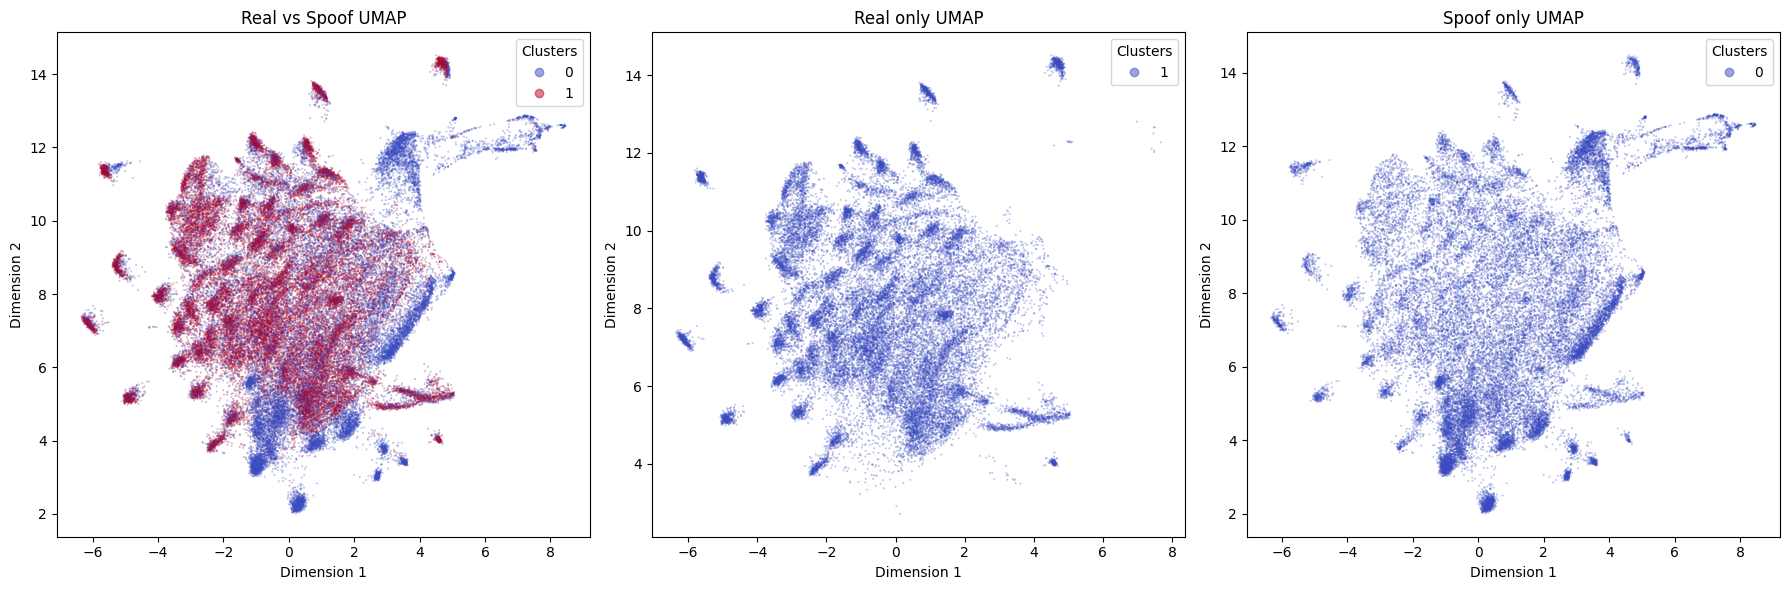

In [13]:
plot_embeddings_subplots(
    [
        X_umap_2d_no_supervised,
        X_umap_2d_no_supervised[target == 1],
        X_umap_2d_no_supervised[target == 0],
    ],
    titles=[
        "Real vs Spoof UMAP",
        "Real only UMAP",
        "Spoof only UMAP"
    ],
    labels_list = [
        target,
        target[target == 1],
        target[target == 0],
    ],
    subplot_size=(6, 6),
    n_cols=3,
    cmap='coolwarm',
    size=0.1,
    alpha=0.5,
)

## Plot with speakers ids as labels

In [27]:
uq_speaker = balanced_meta['speaker_id'].unique()
mapped_speaker = {c: i for i, c in enumerate(uq_speaker)}
speaker_labels = balanced_meta['speaker_id'].map(mapped_speaker).fillna(-1).astype(int).to_numpy()
print(np.unique(speaker_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]


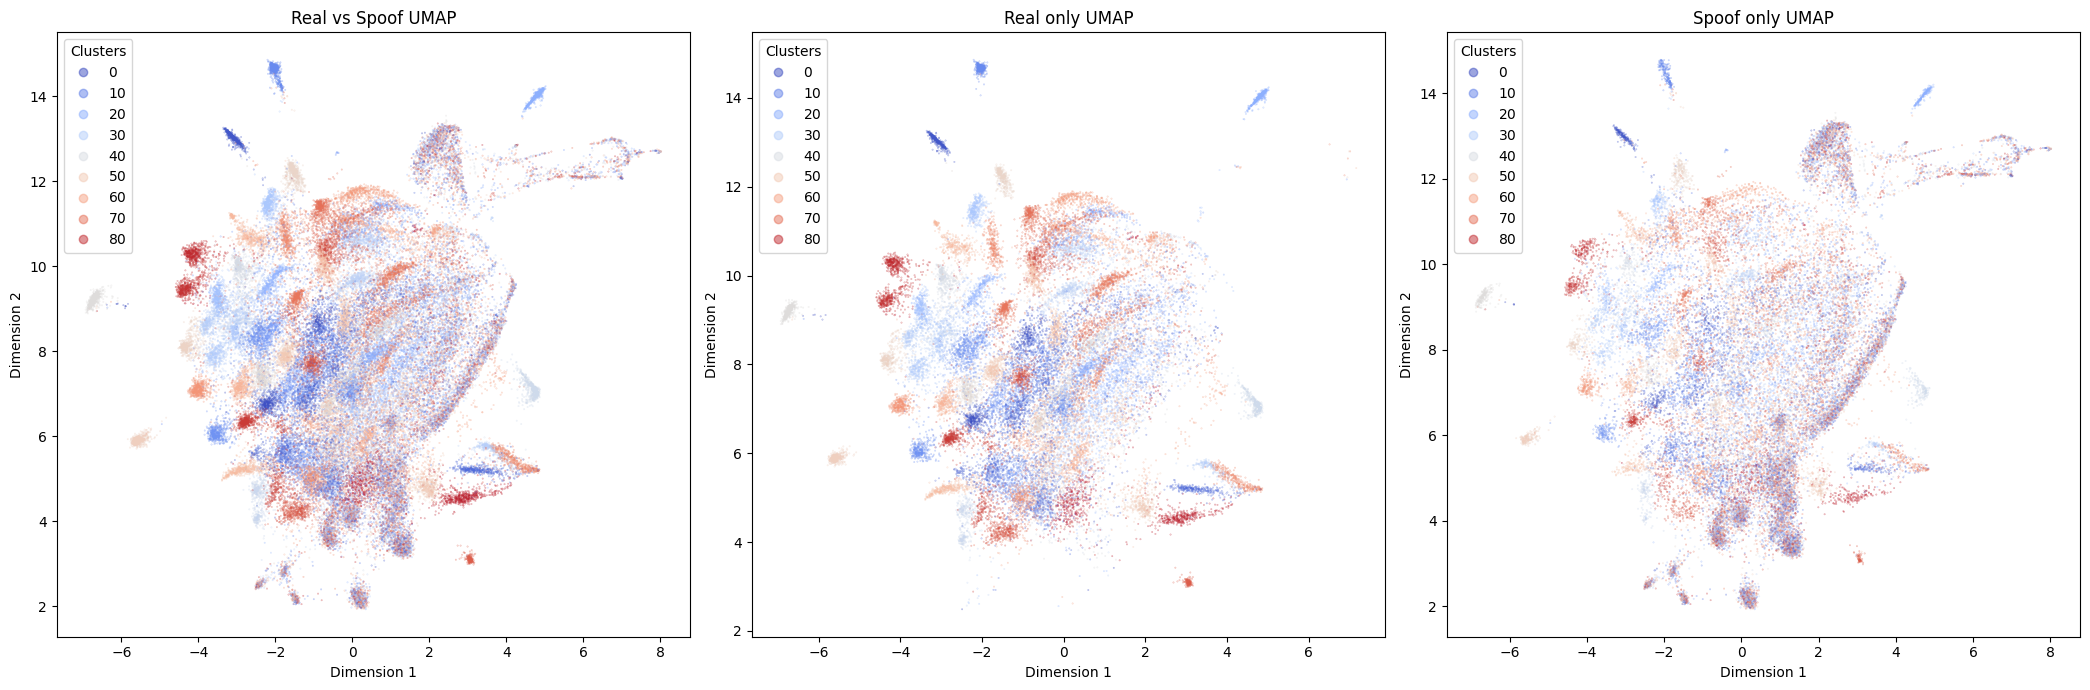

In [30]:
plot_embeddings_subplots(
    [
        X_umap_2d_no_supervised,
        X_umap_2d_no_supervised[target == 1],
        X_umap_2d_no_supervised[target == 0],
    ],
    titles=[
        "Real vs Spoof UMAP",
        "Real only UMAP",
        "Spoof only UMAP"
    ],
    labels_list = [
        speaker_labels,
        speaker_labels[target == 1],
        speaker_labels[target == 0],
    ],
    subplot_size=(7, 7),
    n_cols=3,
    cmap='coolwarm',
    size=0.1,
    alpha=0.5,
)

## Plot with config as labels

In [18]:
uq_config = balanced_meta['config'].unique()
mapped_config = {c: i for i, c in enumerate(uq_config)}
config_labels = balanced_meta['config'].map(mapped_config).fillna(-1).astype(int).to_numpy()
print(np.unique(config_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


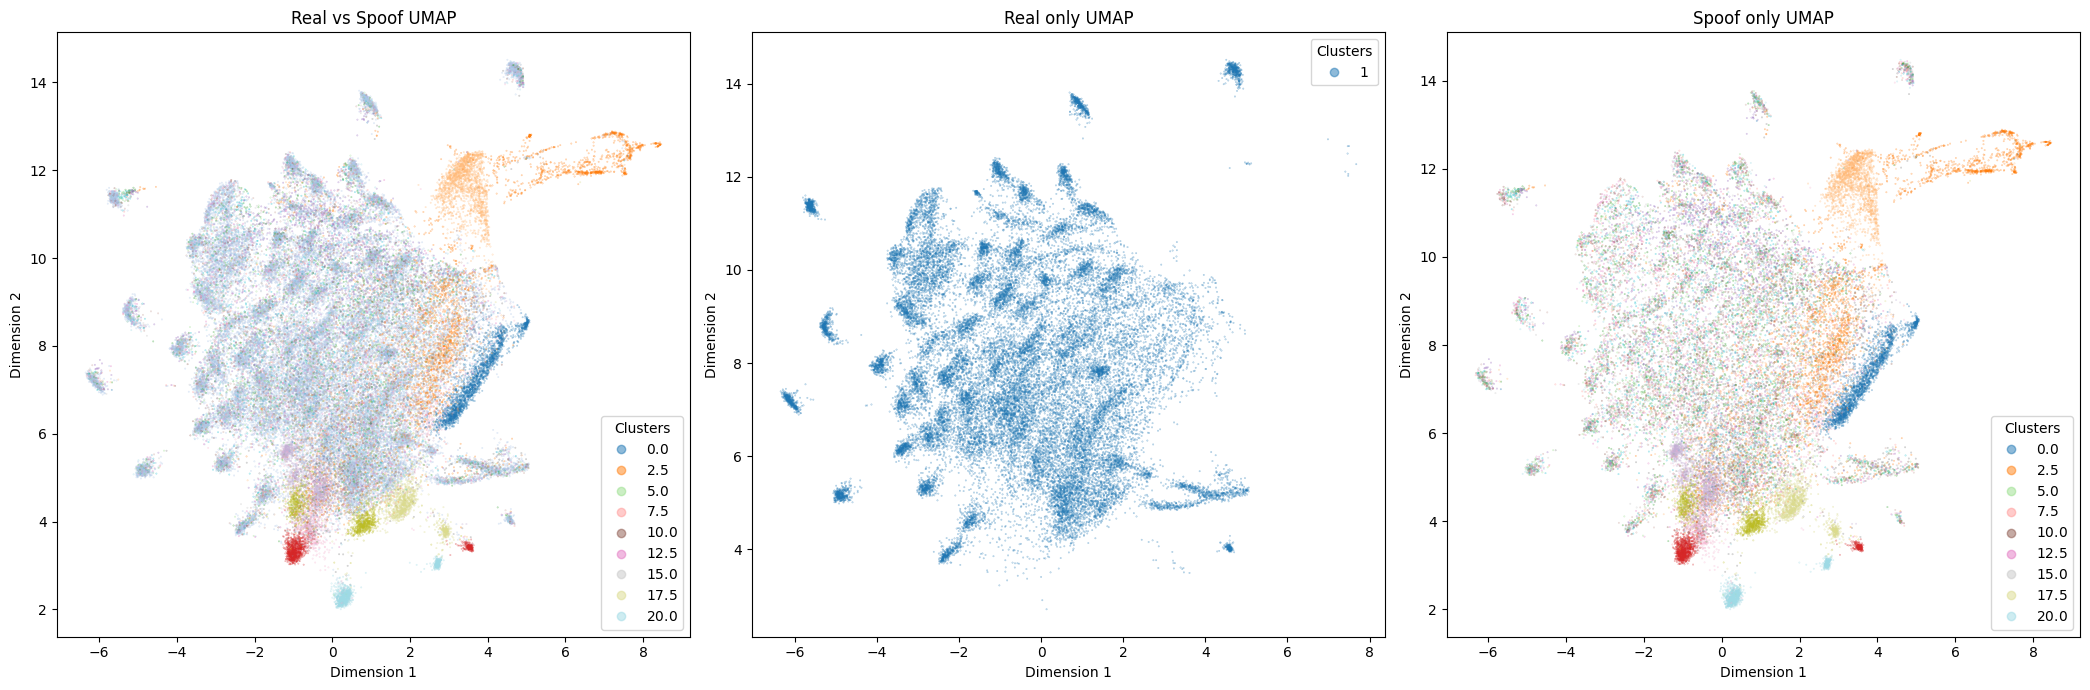

In [20]:
plot_embeddings_subplots(
    [
        X_umap_2d_no_supervised,
        X_umap_2d_no_supervised[target == 1],
        X_umap_2d_no_supervised[target == 0],
    ],
    titles=[
        "Real vs Spoof UMAP",
        "Real only UMAP",
        "Spoof only UMAP"
    ],
    labels_list = [
        config_labels,
        config_labels[target == 1],
        config_labels[target == 0],
    ],
    subplot_size=(7, 7),
    n_cols=3,
    cmap='tab20',
    size=0.1,
    alpha=0.5,
)

In [33]:
uq_config = balanced_meta['config'].unique()
mapped_config = {c: i for i, c in enumerate(uq_config)}
config_labels = balanced_meta['config'].map(mapped_config).fillna(-1).astype(int).to_numpy()
print(np.unique(config_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [34]:
print(mapped_config)
tts_vocoders_map = [1 if 'tts' in key else -1 if 'vocoders' in key else 0 for key in mapped_config]
mapped_config_type = {key: tts_vocoders_map[i] for i, key in enumerate(mapped_config)}
print(tts_vocoders_map)
config_type_labels = balanced_meta['config'].map(mapped_config_type).fillna(-1).astype(int).to_numpy()
print(np.unique(config_type_labels))

{'mls-tts-f5_tts': 0, 'mls-bonafide': 1, 'mls-tts-fish_speech': 2, 'mls-tts-chattts': 3, 'mls-vocoders-full_band_melgan': 4, 'mls-vocoders-hifigan': 5, 'mls-tts-yourtts': 6, 'mls-vocoders-bigvgan': 7, 'mls-vocoders-melgan': 8, 'mls-tts-sparktts': 9, 'mls-vocoders-bigvsan': 10, 'mls-vocoders-multi_band_melgan': 11, 'mls-vocoders-univnet': 12, 'mls-tts-zonos': 13, 'mls-tts-bark': 14, 'mls-vocoders-parallel_wavegan': 15, 'mls-tts-cosyvoice': 16, 'mls-tts-xtts': 17, 'mls-vocoders-style_melgan': 18, 'mls-tts-vits': 19, 'mls-vocoders-vocos': 20}
[1, 0, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1]
[-1  0  1]


## Plot TTS vs Vocoders vs Real

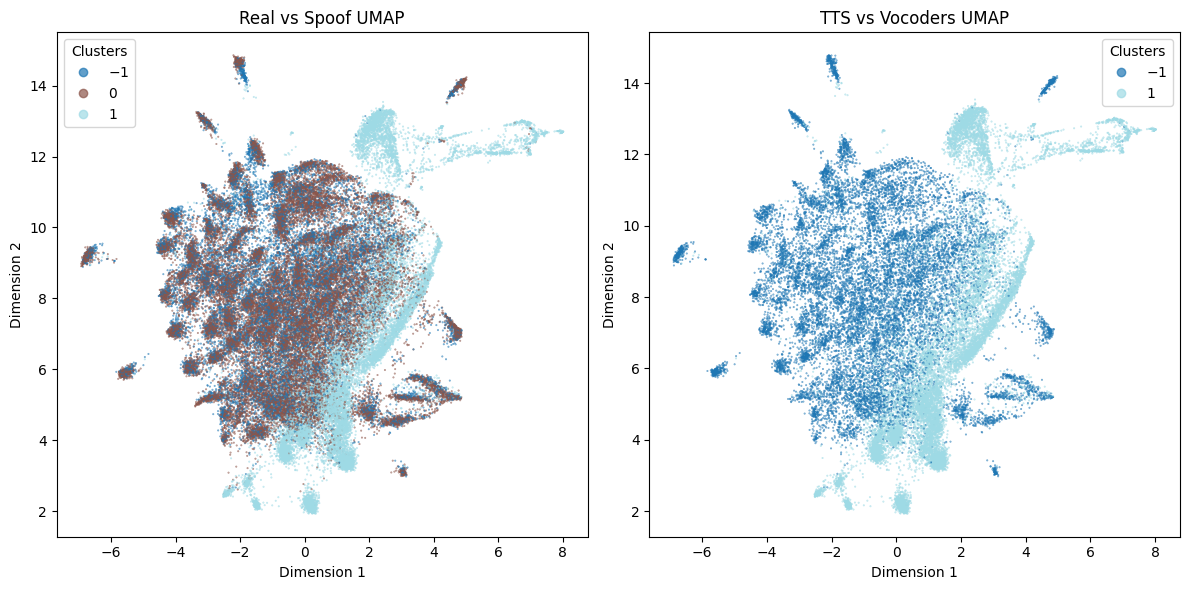

In [38]:
no_bonafide_mask = config_type_labels != 0
plot_embeddings_subplots(
    [
        X_umap_2d_no_supervised,
        X_umap_2d_no_supervised[no_bonafide_mask],
    ],
    titles=[
        "Real vs Spoof UMAP",
        "TTS vs Vocoders UMAP"
    ],
    labels_list = [
        config_type_labels,
        config_type_labels[no_bonafide_mask] ,
    ],
    subplot_size=(6, 6),
    n_cols=2,
    cmap='tab20',
    size=0.2,
)

## Plot 3D UMAP with plotly real vs spoof

In [11]:
from umap import UMAP
import plotly.express as px

umap3d = UMAP(
    n_components=3,
    n_neighbors=40,
    min_dist=0.4,
    metric='cosine'
)
X_umap_3d = umap3d.fit_transform(balanced_emb)

In [21]:
target = (balanced_meta["target"] == "bonafide").astype(int)
fig = px.scatter_3d(
    x=X_umap_3d[:, 0],
    y=X_umap_3d[:, 1],
    z=X_umap_3d[:, 2],
    color=target,
    color_continuous_scale="RdBu",
    labels={"color": "target (1=bonafide, 0=spoof)"},
    title="Interactive 3D UMAP (Plotly)",
    opacity=0.3,
    width=800,
    height=800,
)
fig.update_traces(marker=dict(size=1))
fig.show()

# TSNE Visualization

In [113]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
normalizer = Normalizer("l2")
norm_all = normalizer.fit_transform(balanced_emb)
tsne = TSNE(n_components=2, random_state=44)
reduced_embeddings = tsne.fit_transform(norm_all)

## Real vs Spoof

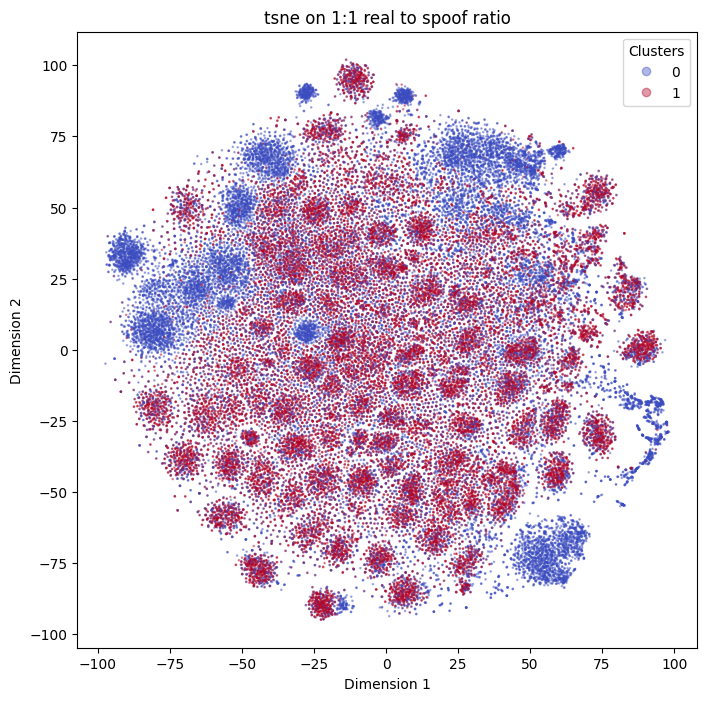

In [142]:
target = (balanced_meta['target'] == 'bonafide').astype(int)
plot_embeddings_2d(
    reduced_embeddings,
    title="tsne on 1:1 real to spoof ratio",
    labels=target,
    size=0.8,
    alpha=0.4,
    figsize=(8, 8),
    cmap='coolwarm',
)

## Real vs Spoof with speakers ids as labels

In [143]:
uq_speaker = balanced_meta['speaker_id'].unique()
mapped_speaker = {c: i for i, c in enumerate(uq_speaker)}
speaker_labels = balanced_meta['speaker_id'].map(mapped_speaker).fillna(-1).astype(int).to_numpy()
print(np.unique(speaker_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]


In [39]:
plot_embeddings_2d(
    reduced_embeddings,
    title="tsne on 1:1 real to spoof ratio",
    labels=speaker_labels,
    size=0.8,
    alpha=0.4,
    figsize=(8, 8),
    cmap='coolwarm',
)

NameError: name 'reduced_embeddings' is not defined

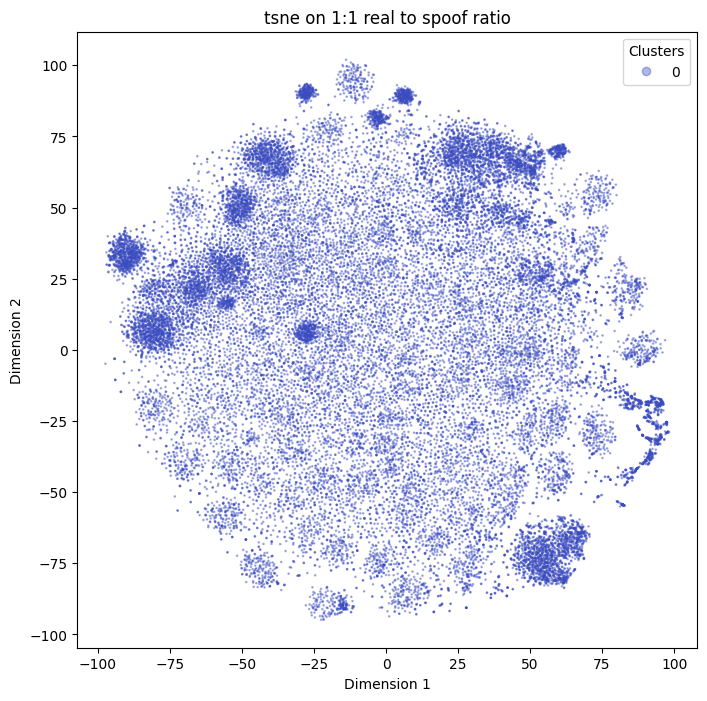

In [149]:
target = (balanced_meta['target'] == 'bonafide').astype(int)
mask = target == 1
plot_embeddings_2d(
    reduced_embeddings[~mask],
    title="tsne on 1:1 real to spoof ratio",
    labels=target[~mask],
    size=0.8,
    alpha=0.4,
    figsize=(8, 8),
    cmap='coolwarm',
)

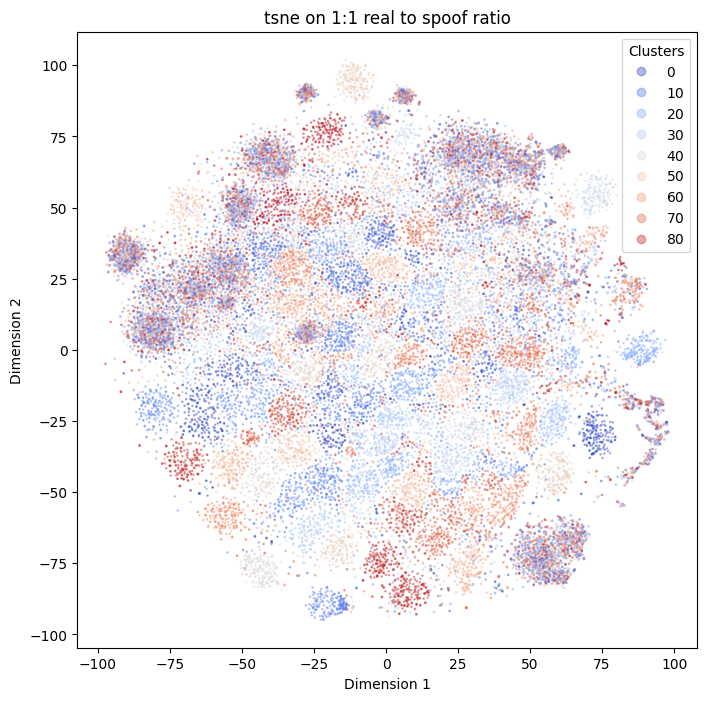

In [150]:
plot_embeddings_2d(
    reduced_embeddings[~mask],
    title="tsne on 1:1 real to spoof ratio",
    labels=speaker_labels[~mask],
    size=0.8,
    alpha=0.4,
    figsize=(8, 8),
    cmap='coolwarm',
)

In [180]:
uq_config = balanced_meta['config'].unique()
mapped_config = {c: i for i, c in enumerate(uq_config)}
config_labels = balanced_meta['config'].map(mapped_config).fillna(-1).astype(int).to_numpy()
print(np.unique(config_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


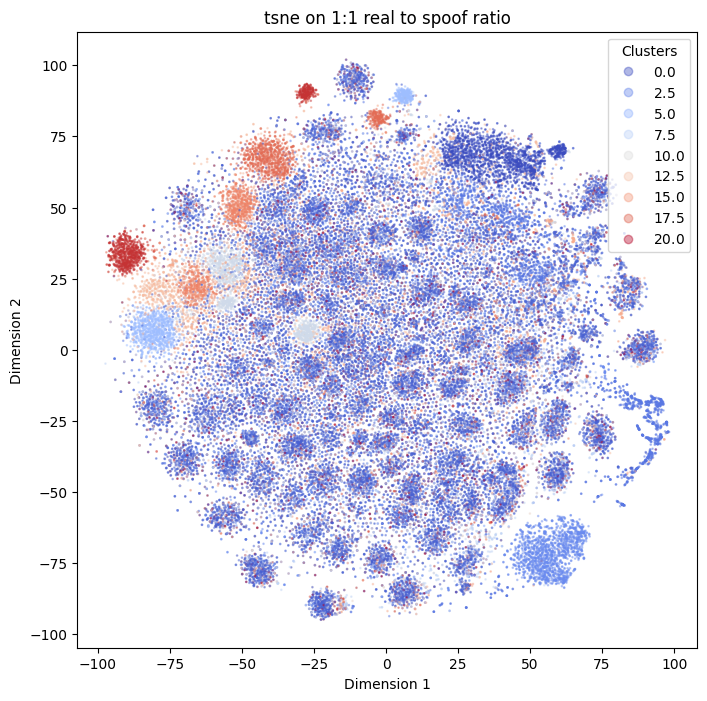

In [181]:
plot_embeddings_2d(
    reduced_embeddings,
    title="tsne on 1:1 real to spoof ratio",
    labels=config_labels,
    size=0.8,
    alpha=0.4,
    figsize=(8, 8),
    cmap='coolwarm',
)

## New Plots 

In [38]:
from src.preprocessing.feature_loader import FeatureLoader
from src.common.constants import Constants as consts
feature_loader = FeatureLoader(file_name=consts.feature_extracted, emb_suffix=consts.fft_emb_suffix)
all_meta, all_embeddings = feature_loader.transfrorm_all()
print(all_meta.shape, all_embeddings.shape)

(1125881, 10) (1125881, 1026)


In [39]:
voc_mask = all_meta['config'].str.contains('vocoders')
no_voc_meta = all_meta[~voc_mask]
print(no_voc_meta.shape)

no_voc_embeddings = feature_loader.load_embeddings_from_metadata(no_voc_meta)
print(no_voc_embeddings.shape)

(602603, 10)
(602603, 1026)


In [40]:
import numpy as np
undersample = UndersampleSpoofBalancer()
balanced_meta = undersample.transform(no_voc_meta)
uq_target = np.unique(balanced_meta['target'], return_counts=True)
print(uq_target, np.sum(uq_target[-1]))
balanced_emb = feature_loader.load_embeddings_from_metadata(balanced_meta)
print(balanced_emb.shape)

(array(['bonafide', 'spoof'], dtype=object), array([52512, 52512])) 105024
(105024, 1026)


In [41]:
sampled_meta = feature_loader.sample_fraction(fraction=0.6, metadata=balanced_meta)
sampled_emb = feature_loader.load_embeddings_from_metadata(sampled_meta)
print(sampled_meta.shape, sampled_emb.shape)

(63014, 10) (63014, 1026)


In [42]:
from src.common.basic_functions import plot_embeddings_2d
from umap import UMAP

umap_model = UMAP(
    n_components=2,
    n_neighbors=30,
    min_dist=0.2,
    metric='cosine',
)
target = (sampled_meta['target'] == 'bonafide').astype(int)
X_umap_2d_no_supervised = umap_model.fit_transform(X=sampled_emb)

In [43]:
uq_config = sampled_meta['config'].unique()
mapped_config = {c: i for i, c in enumerate(uq_config)}
config_labels = sampled_meta['config'].map(mapped_config).fillna(-1).astype(int).to_numpy()
print(np.unique(config_labels))

[ 0  1  2  3  4  5  6  7  8  9 10]


In [45]:
print(uq_config)
no_fish_mask = config_labels != mapped_config['mls-tts-fish_speech']
print(len(no_fish_mask), print(np.unique(config_labels[no_fish_mask])))

['mls-bonafide' 'mls-tts-xtts' 'mls-tts-chattts' 'mls-tts-bark'
 'mls-tts-fish_speech' 'mls-tts-zonos' 'mls-tts-f5_tts'
 'mls-tts-cosyvoice' 'mls-tts-vits' 'mls-tts-yourtts' 'mls-tts-sparktts']
[ 0  1  2  3  5  6  7  8  9 10]
63014 None


In [46]:
print(mapped_config['mls-tts-fish_speech'])

4


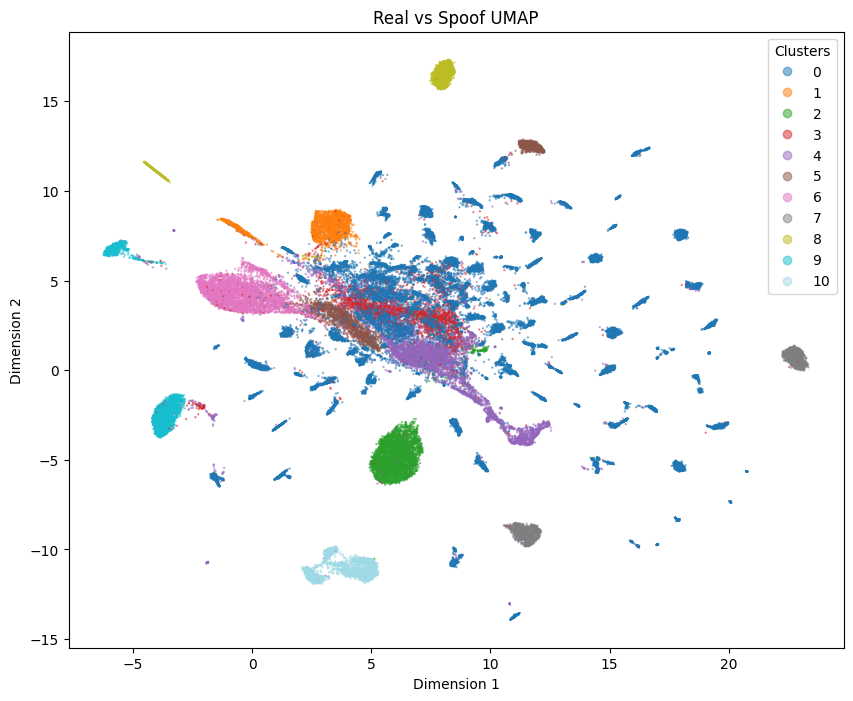

In [47]:
plot_embeddings_2d(
    X_umap_2d_no_supervised,
    title="Real vs Spoof UMAP",
    labels=config_labels,
    size=0.5,
    alpha=0.5,
    figsize=(10, 8),
    cmap='tab20',
)

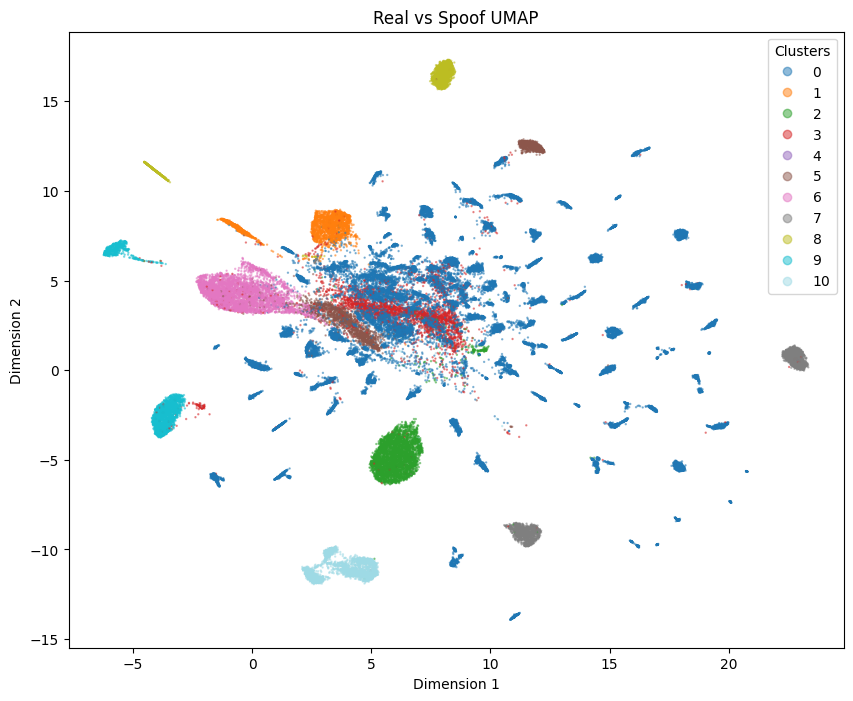

In [48]:
plot_embeddings_2d(
    X_umap_2d_no_supervised[no_fish_mask],
    title="Real vs Spoof UMAP",
    labels=config_labels[no_fish_mask],
    size=0.5,
    alpha=0.5,
    figsize=(10, 8),
    cmap='tab20',
)

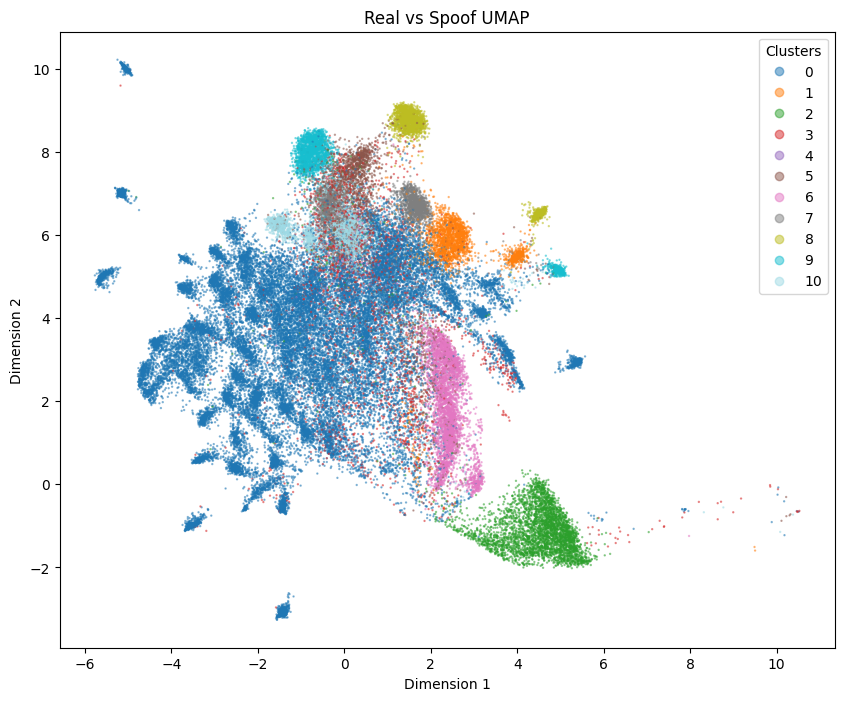

In [27]:
plot_embeddings_2d(
    X_umap_2d_no_supervised[no_fish_mask],
    title="Real vs Spoof UMAP",
    labels=config_labels[no_fish_mask],
    size=0.5,
    alpha=0.5,
    figsize=(10, 8),
    cmap='tab20',
)

In [17]:
from umap import UMAP
import plotly.express as px

umap3d = UMAP(
    n_components=3,
    n_neighbors=40,
    min_dist=0.4,
    metric='cosine'
)
X_umap_3d = umap3d.fit_transform(sampled_emb)

In [ ]:
no_fish_mask

In [19]:
import plotly.express as px

target = (sampled_meta["target"] == "bonafide").astype(int)
fig = px.scatter_3d(
    x=X_umap_3d[:, 0],
    y=X_umap_3d[:, 1],
    z=X_umap_3d[:, 2],
    color=target,
    color_continuous_scale="RdBu",
    labels={"color": "target (1=bonafide, 0=spoof)"},
    title="Interactive 3D UMAP (Plotly)",
    opacity=0.3,
    width=800,
    height=800,
)
fig.update_traces(marker=dict(size=1))
fig.show()

In [65]:
feature_loader = FeatureLoader(file_name=consts.feature_extracted, emb_suffix=consts.wavlm_emb_suffix)
dev_meta, dev_embeddings = feature_loader.transform(split_name='dev')
print(dev_meta.shape, dev_embeddings.shape)

voc_dev_mask = dev_meta['config'].str.contains('vocoders')
no_fish_mask_dev = dev_meta['config'] != 'mls-tts-fish_speech'
no_voc_meta_dev = dev_meta[(~voc_dev_mask) & no_fish_mask_dev]
print(no_voc_meta_dev.shape)

balanced_meta_dev = undersample.transform(no_voc_meta_dev)
print(balanced_meta_dev.shape)
balanced_emb_dev = feature_loader.load_embeddings_from_metadata(balanced_meta_dev)
print(balanced_emb_dev.shape, balanced_meta_dev.shape)
print(np.unique(balanced_meta_dev['config']))

(158372, 10) (158372, 768)
(68775, 10)
(14672, 10)
(14672, 768) (14672, 10)
['mls-bonafide' 'mls-tts-bark' 'mls-tts-chattts' 'mls-tts-cosyvoice'
 'mls-tts-f5_tts' 'mls-tts-sparktts' 'mls-tts-vits' 'mls-tts-xtts'
 'mls-tts-yourtts' 'mls-tts-zonos']


In [66]:
train_meta, train_embeddings = feature_loader.transform(split_name='train')
print(train_meta.shape, train_embeddings.shape)

voc_train_mask = train_meta['config'].str.contains('vocoders')
no_fish_mask_train = train_meta['config'] != 'mls-tts-fish_speech'
no_voc_meta_train = train_meta[(~voc_train_mask) & no_fish_mask_train]
print(no_voc_meta_train.shape)

balanced_meta_train = undersample.transform(no_voc_meta_train)
print(balanced_meta_train.shape)
balanced_emb_train = feature_loader.load_embeddings_from_metadata(balanced_meta_train)
print(balanced_emb_train.shape, balanced_meta_train.shape)
print(np.unique(balanced_meta_train['config']))

(788680, 10) (788680, 768)
(345074, 10)
(73742, 10)
(73742, 768) (73742, 10)
['mls-bonafide' 'mls-tts-bark' 'mls-tts-chattts' 'mls-tts-cosyvoice'
 'mls-tts-f5_tts' 'mls-tts-sparktts' 'mls-tts-vits' 'mls-tts-xtts'
 'mls-tts-yourtts' 'mls-tts-zonos']


## Results for MLP without all vocoders

### Eval on fft extracted features

In [51]:
from src.models.mlp_classifier import MLPClassifier

mlp = MLPClassifier(
)

mlp.optuna_fit(
    n_trials=50,
    X_train=balanced_emb,
    y_train=(balanced_meta['target'] == 'bonafide').astype(int),
    X_dev=balanced_emb_dev,
    y_dev=(balanced_meta_dev['target'] == 'bonafide').astype(int)
)

2026-01-26 23:07:45 | INFO     | audio_deepfake.MLPClassifier | Initialized model: MLPClassifier
2026-01-26 23:07:45 | INFO     | audio_deepfake.MLPClassifier | Using device: mps


(array([0., 1.], dtype=float32), array([52512, 52512])) (array([0., 1.], dtype=float32), array([7336, 7336]))


[I 2026-01-26 23:07:48,740] A new study created in memory with name: no-name-c9e76e3e-a470-4dc2-93d5-e62657017bbf


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-01-26 23:10:02,826] Trial 0 finished with value: 0.7707943300347686 and parameters: {'n_layers': 2, 'hidden_size': 512, 'dropout_rate': 0.36666569496719004, 'lr': 0.0001547593253978115, 'weight_decay': 0.0004491071745134927, 'epochs': 40, 'batch_size': 64}. Best is trial 0 with value: 0.7707943300347686.
[I 2026-01-26 23:10:21,657] Trial 1 finished with value: 0.0 and parameters: {'n_layers': 3, 'hidden_size': 64, 'dropout_rate': 0.3915496845109932, 'lr': 0.0013062004197142245, 'weight_decay': 0.00022564078241376178, 'epochs': 13, 'batch_size': 512}. Best is trial 0 with value: 0.7707943300347686.
[I 2026-01-26 23:11:02,997] Trial 2 finished with value: 0.7744523621008181 and parameters: {'n_layers': 2, 'hidden_size': 192, 'dropout_rate': 0.2630873921590298, 'lr': 0.0002595749457401066, 'weight_decay': 4.599055788404769e-06, 'epochs': 17, 'batch_size': 128}. Best is trial 2 with value: 0.7744523621008181.
[I 2026-01-26 23:11:37,404] Trial 3 finished with value: 0.77382210014789

### Eval on wavlm extracted features

In [ ]:
from src.models.mlp_classifier import MLPClassifier

mlp = MLPClassifier(
)

mlp.optuna_fit(
    n_trials=50,
    X_train=balanced_emb,
    y_train=(balanced_meta['target'] == 'bonafide').astype(int),
    X_dev=balanced_emb_dev,
    y_dev=(balanced_meta_dev['target'] == 'bonafide').astype(int)
)

## Results without all vocoders and fish speech

### Eval on fft extracted features

In [64]:
from src.models.mlp_classifier import MLPClassifier

X_train = balanced_emb_train
y_train = (balanced_meta_train['target'] == 'bonafide').astype(int)

meta_dev = balanced_meta_dev
X_dev = balanced_emb_dev
y_dev = (meta_dev['target'] == 'bonafide').astype(int)

mlp = MLPClassifier(
)

mlp.optuna_fit(
    n_trials=20,
    X_train=X_train,
    y_train=y_train,
    X_dev=X_dev,
    y_dev=y_dev
)

2026-01-26 23:39:17 | INFO     | audio_deepfake.MLPClassifier | Initialized model: MLPClassifier
2026-01-26 23:39:17 | INFO     | audio_deepfake.MLPClassifier | Using device: mps


(array([0., 1.], dtype=float32), array([36871, 36871])) (array([0., 1.], dtype=float32), array([7336, 7336]))


[I 2026-01-26 23:39:17,736] A new study created in memory with name: no-name-c8f74531-f4f7-44ff-bc51-057d0ad1d9af


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-01-26 23:40:37,601] Trial 0 finished with value: 0.7983884140033756 and parameters: {'n_layers': 2, 'hidden_size': 448, 'dropout_rate': 0.32071345046011834, 'lr': 0.0026496027582045382, 'weight_decay': 3.882394044075981e-05, 'epochs': 48, 'batch_size': 128}. Best is trial 0 with value: 0.7983884140033756.
[I 2026-01-26 23:41:10,677] Trial 1 finished with value: 0.8004859462145895 and parameters: {'n_layers': 3, 'hidden_size': 256, 'dropout_rate': 0.3274898835530489, 'lr': 0.0013015891451316972, 'weight_decay': 0.0009129053392158822, 'epochs': 10, 'batch_size': 64}. Best is trial 1 with value: 0.8004859462145895.
[I 2026-01-26 23:41:37,455] Trial 2 finished with value: 0.5571228243834034 and parameters: {'n_layers': 1, 'hidden_size': 128, 'dropout_rate': 0.3082787919733054, 'lr': 0.0013461870882805695, 'weight_decay': 2.8082815296901265e-06, 'epochs': 24, 'batch_size': 256}. Best is trial 1 with value: 0.8004859462145895.
[I 2026-01-26 23:42:22,754] Trial 3 finished with value: 

### Eval on wavlm extracted features

In [67]:
from src.models.mlp_classifier import MLPClassifier

X_train = balanced_emb_train
y_train = (balanced_meta_train['target'] == 'bonafide').astype(int)

meta_dev = balanced_meta_dev
X_dev = balanced_emb_dev
y_dev = (meta_dev['target'] == 'bonafide').astype(int)

mlp = MLPClassifier(
)

mlp.optuna_fit(
    n_trials=20,
    X_train=X_train,
    y_train=y_train,
    X_dev=X_dev,
    y_dev=y_dev
)

2026-01-26 23:53:39 | INFO     | audio_deepfake.MLPClassifier | Initialized model: MLPClassifier
2026-01-26 23:53:39 | INFO     | audio_deepfake.MLPClassifier | Using device: mps


(array([0., 1.], dtype=float32), array([36871, 36871])) (array([0., 1.], dtype=float32), array([7336, 7336]))


[I 2026-01-26 23:53:48,066] A new study created in memory with name: no-name-9e8ec744-0df7-45d7-8e07-a7129d266709


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2026-01-26 23:55:24,955] Trial 0 finished with value: 0.8026711916361049 and parameters: {'n_layers': 2, 'hidden_size': 384, 'dropout_rate': 0.22407151771603884, 'lr': 0.0010022890200250603, 'weight_decay': 8.593630879260818e-06, 'epochs': 38, 'batch_size': 64}. Best is trial 0 with value: 0.8026711916361049.
[I 2026-01-26 23:55:56,415] Trial 1 finished with value: 0.7991278277459798 and parameters: {'n_layers': 1, 'hidden_size': 128, 'dropout_rate': 0.2130465458073192, 'lr': 0.002206719841570161, 'weight_decay': 4.1526283927537916e-05, 'epochs': 23, 'batch_size': 128}. Best is trial 0 with value: 0.8026711916361049.
[I 2026-01-26 23:56:22,475] Trial 2 finished with value: 0.79007942940509 and parameters: {'n_layers': 1, 'hidden_size': 320, 'dropout_rate': 0.2154040602917245, 'lr': 0.00010891780554300556, 'weight_decay': 0.0002802474423809974, 'epochs': 25, 'batch_size': 1024}. Best is trial 0 with value: 0.8026711916361049.
[I 2026-01-26 23:57:04,281] Trial 3 finished with value: 0